<a href="https://colab.research.google.com/github/asu2304/Generative_Adversarial_Network-GAN-/blob/main/GAN(Generative_Adverserial_Networks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adverserial Networks(GAN's)

In [1]:
# this is to bring the tensorflow locally

# import tensorflow as tf
# gpus = tf.config.experimental.list_physical_device('GPU')
# for gpu in gpus:
#   tf.config.experimental.set_memory_growth(gpu, True)
#   print(gpu)

In [2]:
!pip install tensorflow_datasets

In [3]:
#  for the data
import tensorflow_datasets as tfds
# for visulization
from matplotlib import pyplot as plt


In [4]:
# used tensorflow dataset to load the data
ds = tfds.load('fashion_mnist', split = 'train')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteT25JU6/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteT25JU6/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
ds.as_numpy_iterator().next() # this is dictionary containing image and their lables
ds.as_numpy_iterator().next().keys() # let's see the keys of the dictionary

dict_keys(['image', 'label'])

In [6]:
ds.as_numpy_iterator().next()['label']

2

## Data Visualization and Build Datasets

In [7]:
# to do some data transformation

In [8]:
import numpy as np

In [9]:
# setting up connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [10]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

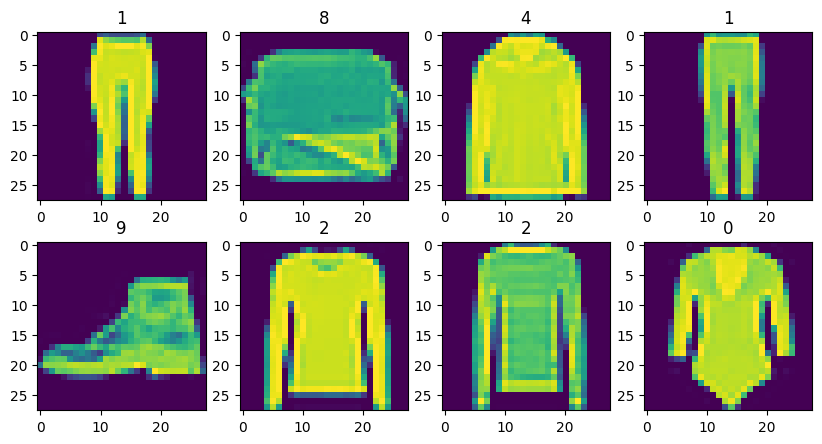

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# getting data out of the pipeline
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(10, 5))
for idx in range(8):  # Adjusted to 16 to match 4x4 grid
    sample = dataiterator.next()
    ax[idx // 4, idx % 4].imshow(np.squeeze(sample['image']))  # Corrected the indexing to access the subplot
    ax[idx // 4, idx % 4].set_title(sample['label'])  # Corrected the method name to set_title

plt.show()


In [12]:
ax

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '0'}>]],
      dtype=object)

In [13]:
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

## scaling - nn's performs a little better and fast too

In [14]:
def scale_images(data):
  image = data['image']
  return image / 255

**Steps to build data pipelines**

1.   cahce
2.   shuffle
3.   batch
4.   prefetch


In [15]:
# reloading the dataset
ds = tfds.load("fashion_mnist", split = 'train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [16]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Building the neural networks

### Importing modeling components

In [ ]:
!pip install tensorflow

In [18]:
# we will use Sequenctial api
from tensorflow.keras.models import Sequential
# bring in the layers for the neural networks
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## Buiding Generator

In [32]:
def build_generator():

  # using the sequential api
  model = Sequential()

  # takes in random value and reshape it as 7*7*128
  model.add(Dense(7*7*128, input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  # upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # convlolution block
  model.add(Conv2D(128, 4, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # convlolution block
  model.add(Conv2D(128, 4, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # conv layer to get to one channel
  model.add(Conv2D(1, 4, padding = 'same', activation = 'sigmoid'))
  model.add(LeakyReLU(0.2))

  return model

In [33]:
test_model = build_generator()


In [34]:
test_model.summary() # don't get why parameters in second convolutoin layer is that high!

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

### Testing the generator

In [36]:
# let's test the genrator model - it should generate random images
generator = build_generator()


In [ ]:
img = generator.predict(np.random.randn(4, 128, 1))
img

In [47]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 127ms/step


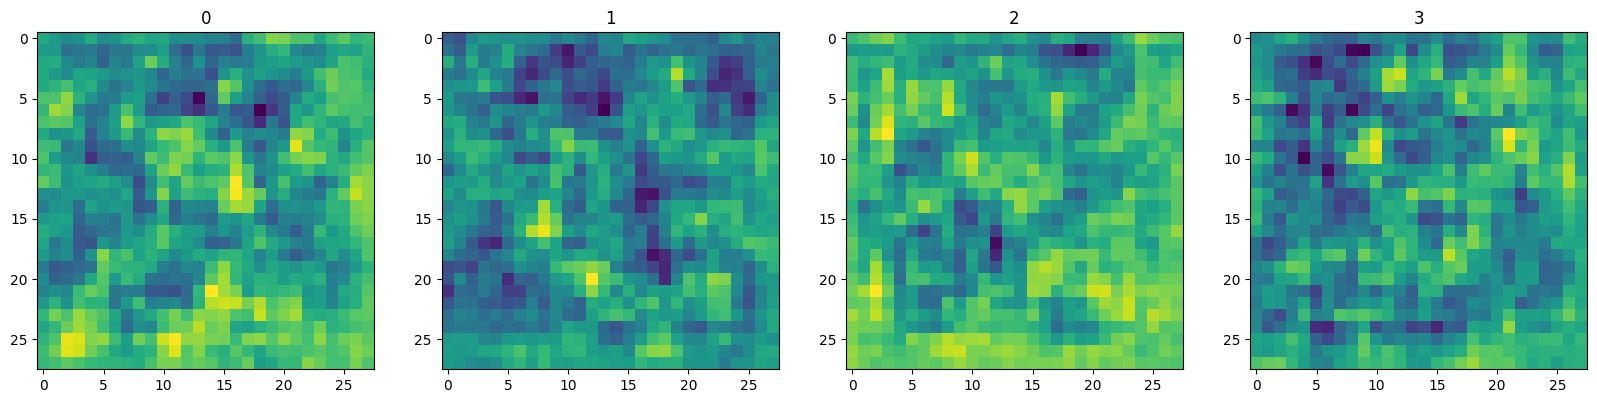

In [52]:
# to generate different images everytime
img = generator.predict(np.random.randn(4, 128, 1))
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(img):

  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

## Building Discriminator